In [1]:
# We first verify the correct version of TF installed
# !pip install -q tensorflow-gpu==2.1.0

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from mpl_toolkits.mplot3d import Axes3D

TensorFlow 2.x selected.
2.1.0


In [0]:
# Then, we create an artificial dataset
N = 1000
X = np.random.random((N, 2)) * 6 - 3 # Uniformly distributed between (-3, 3)
y = np.cos(2 * X[:,0]) + np.cos(3 * X[:,1])

This implements the function:

$$ y = \cos(2x_1) + cos(3x_2) $$

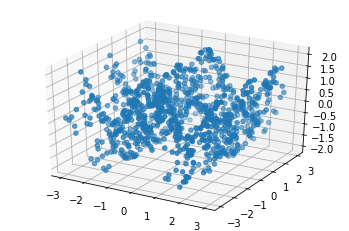

In [3]:
# Plot the figure

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], y)

In [0]:
# After this, we start to build the model
# No activation function needed at end.
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape = (2,), activation= 'relu'),
    tf.keras.layers.Dense(1)
])

In [0]:
# Now we comepile the model
# Next, we compile the model, with default settings
optimizer = tf.keras.optimizers.Adam(1e-2)
model.compile(
    optimizer= optimizer,
    loss = 'mse',
)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               384       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


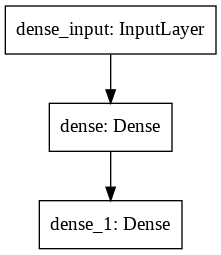

In [6]:
# We print out a summery of our model
model.summary()
tf.keras.utils.plot_model(model, to_file = './drive/My Drive/Tensorflow 2.0 Course/Feedforward Artificial Neural Networks/models/Regression.png')

In [0]:
# We create a ModelCheckpoint function for keeping track of the accuracy
import os
!pip install -q pyyaml h5py

if not os.path.exists('./drive/My Drive/Tensorflow 2.0 Course/Feedforward Artificial Neural Networks/models'):
  os.mkdir('./drive/My Drive/Tensorflow 2.0 Course/Feedforward Artificial Neural Networks/models')

checkpoint_path = "./drive/My Drive/Tensorflow 2.0 Course/Feedforward Artificial Neural Networks/models/Regression.h5"
checkpoint_dir = os.path.dirname(checkpoint_path)

ModelCheckpoint = [tf.keras.callbacks.ModelCheckpoint(
    # filepath = 'content/drive/My Drive/Tensorflow 2.0 Course/Feedforward Artificial Neural Networks/models/MNIST.cpkt',
    filepath = checkpoint_path,
    monitor='val_loss',
    mode = 'min',
    save_best_only = True,
)]

In [8]:
r = model.fit(X, y, epochs= 100, callbacks= ModelCheckpoint)

Train on 1000 samples
Epoch 1/100
1000/1000 [==============================] - 0s 314us/sample - loss: 0.9366
Epoch 2/100
1000/1000 [==============================] - 0s 43us/sample - loss: 0.9187
Epoch 3/100
1000/1000 [==============================] - 0s 48us/sample - loss: 0.8849
Epoch 4/100
1000/1000 [==============================] - 0s 51us/sample - loss: 0.8613
Epoch 5/100
1000/1000 [==============================] - 0s 49us/sample - loss: 0.8472
Epoch 6/100
1000/1000 [==============================] - 0s 46us/sample - loss: 0.8839
Epoch 7/100
1000/1000 [==============================] - 0s 49us/sample - loss: 0.8083
Epoch 8/100
1000/1000 [==============================] - 0s 53us/sample - loss: 0.7902
Epoch 9/100
1000/1000 [==============================] - 0s 43us/sample - loss: 0.7452
Epoch 10/100
1000/1000 [==============================] - 0s 56us/sample - loss: 0.7320
Epoch 11/100
1000/1000 [==============================] - 0s 61us/sample - loss: 0.6238
Epoch 12/100
1000/

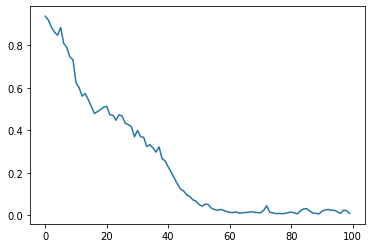

In [9]:
# Plot the loss for checking convergence
plt.plot(r.history['loss'], label='loss')

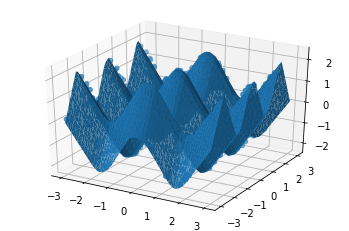

In [15]:
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], y)

# surface plot
line = np.linspace(-3, 3, 50) # 50 evenlyspaced points
xx, yy = np.meshgrid(line, line) # Create a meshgrid by doing a cross product
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T # Need to flatted to then convert into the desired format
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()

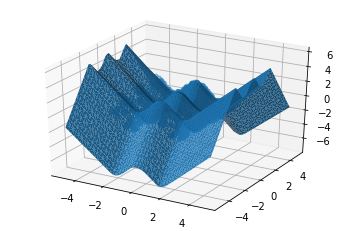

In [16]:
# Can it extrapolate?
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], y)

# surface plot
line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()